<a href="https://colab.research.google.com/github/Saize1/CRUD/blob/master/CE605A_231030037_SAIZE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

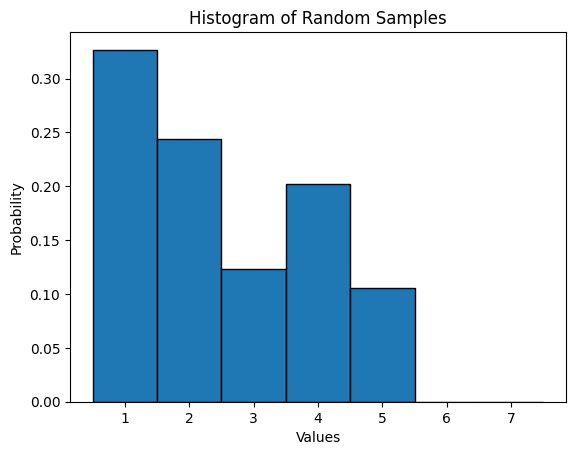

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Given pmf
values = np.array([1, 2, 3, 4, 5, 6])
pmf = np.array([0.1, 0.3, 0.2, 0.1, 0.2, 0.1])

# Step 1: Compute the CDF
cdf = np.cumsum(pmf)

# Step 2: Generate random uniform samples
random_uniform_samples = np.random.rand(500)

# Step 3: Use the inverse CDF to get samples from the desired distribution
random_samples = np.searchsorted(cdf, random_uniform_samples)

# Plot the histogram
plt.hist(random_samples, bins=np.arange(0.5, 8.5, 1), edgecolor='black', align='mid', density=True)
plt.title('Histogram of Random Samples')
plt.xlabel('Values')
plt.ylabel('Probability')
plt.show()


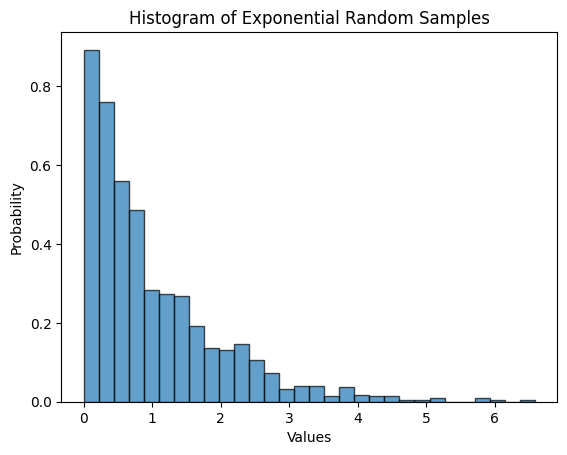

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_val = 1  # Rate parameter for the exponential distribution

# Inverse CDF for the exponential distribution
def inverse_cdf_exponential(u, lambda_val):
    # Handling the case where u is very close to 1
    u = np.clip(u, 1e-15, 1 - 1e-15)
    return -np.log(1 - u) / lambda_val

# Step 1: Generate random uniform samples
random_uniform_samples = np.random.rand(1000)

# Step 2: Use the inverse CDF to get samples from the exponential distribution
random_samples = inverse_cdf_exponential(random_uniform_samples, lambda_val)

# Plot the histogram
plt.hist(random_samples, bins=30, edgecolor='black', density=True, alpha=0.7)
plt.title('Histogram of Exponential Random Samples')
plt.xlabel('Values')
plt.ylabel('Probability')
plt.show()


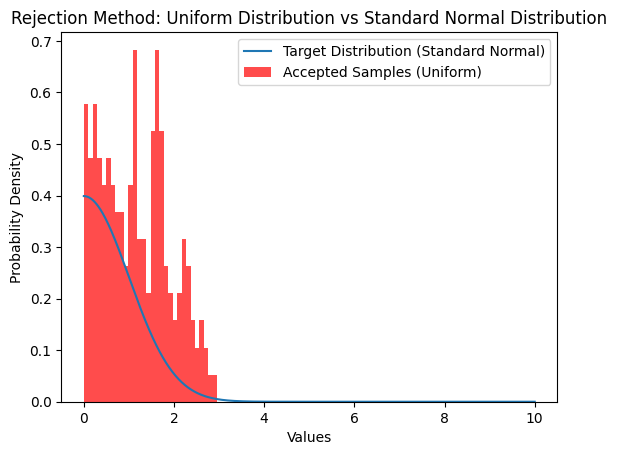

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sample_size = 1000
lower_bound = 0
upper_bound = 10

# Target distribution (standard normal)
def target_distribution(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# Proposal distribution (uniform)
proposal_samples = np.random.uniform(lower_bound, upper_bound, sample_size)

# Acceptance/rejection criterion
acceptance_criteria = target_distribution(proposal_samples) / (1 / (upper_bound - lower_bound))

# Generate random values from a uniform distribution to determine acceptance or rejection
random_values = np.random.rand(sample_size)

# Accept the sample if it falls within the acceptance criteria; otherwise, reject it
accepted_samples = proposal_samples[random_values < acceptance_criteria]

# Plotting
x = np.linspace(lower_bound, upper_bound, 1000)
plt.plot(x, target_distribution(x), label='Target Distribution (Standard Normal)')
plt.hist(accepted_samples, bins=30, color="red",density=True, alpha=0.7, label='Accepted Samples (Uniform)')
plt.title('Rejection Method: Uniform Distribution vs Standard Normal Distribution')
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


In [6]:
import numpy as np

# Given values
sensitivity = 0.95
specificity = 0.90
prevalence = 0.01
sample_size = 1000

# Bayes' Theorem to calculate PPV
ppv_formula = (sensitivity * prevalence) / (sensitivity * prevalence + (1 - specificity) * (1 - prevalence))

# Simulation
simulated_results = np.random.rand(sample_size) < prevalence
positive_results = np.random.rand(sample_size) < sensitivity

# Calculate PPV from the simulation
ppv_simulation = np.sum(positive_results & simulated_results) / np.sum(positive_results)

# Display results
print("Given Values:")
print("Sensitivity: {:.2f}".format(sensitivity))
print("Specificity: {:.2f}".format(specificity))
print("Prevalence: {:.2f}".format(prevalence))
print("\nCalculated PPV:")
print("PPV (Formula): {:.4f}".format(ppv_formula))
print("PPV (Simulation): {:.4f}".format(ppv_simulation))


Given Values:
Sensitivity: 0.95
Specificity: 0.90
Prevalence: 0.01

Calculated PPV:
PPV (Formula): 0.0876
PPV (Simulation): 0.0104
